# K-Nearest Neighbors

## Thêm thư viện

In [1]:
install.packages("class")
install.packages("caret")
install.packages("ggplot2")
install.packages("smotefamily")
library(class)
library(caret)
library(ggplot2)
library(smotefamily)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’


Loading required package: ggplot2

Loading required package: lattice



## Nạp dữ liệu

In [2]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

In [ ]:
str(wine)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


## Tạo nhãn nhị phân: good (>=7) = 1, else = 0

In [3]:
wine$quality_label <- ifelse(wine$quality >= 7, 1, 0)
wine$quality <- NULL
wine$quality_label <- as.factor(wine$quality_label)

## Phân chia thành phần tập huấn luyện và kiểm thử

In [4]:
set.seed(123)
index <- createDataPartition(wine$quality_label, p = 0.8, list = FALSE)
train_data <- wine[index, ]
test_data <- wine[-index, ]

## Áp dụng Smote

In [5]:
train_x <- train_data[, -ncol(train_data)]
train_y <- as.numeric(as.character(train_data$quality_label))

smote_result <- SMOTE(train_x, train_y, K = 5)
train_smote <- smote_result$data
train_smote$quality_label <- as.factor(train_smote$class)
train_smote$class <- NULL

cat("Phân bố sau SMOTE:\n")
print(table(train_smote$quality_label))

Phân bố sau SMOTE:

   0    1 
1106 1044 


## Chuẩn hóa(feature scaling)

In [6]:
pre_proc <- preProcess(train_smote[, -ncol(train_smote)], method = c("center", "scale"))
train_scaled <- train_smote
test_scaled <- test_data
train_scaled[, -ncol(train_scaled)] <- predict(pre_proc, train_smote[, -ncol(train_smote)])
test_scaled[, -ncol(test_scaled)]   <- predict(pre_proc, test_data[, -ncol(test_data)])

## Tìm K tối ưu

In [7]:
error_rate <- c()
k_range <- 3:40
for (k_val in k_range) {
  pred_k <- knn(train_scaled[, -ncol(train_scaled)], test_scaled[, -ncol(test_scaled)],
                cl = train_scaled$quality_label, k = k_val)
  error_rate <- c(error_rate, mean(pred_k != test_scaled$quality_label))
}
best_k <- k_range[which.min(error_rate)]
cat("K tối ưu:", best_k, "- Tỷ lệ lỗi thấp nhất:", round(min(error_rate), 4), "\n")


K tối ưu: 3 - Tỷ lệ lỗi thấp nhất: 0.1536 


## Huấn luyện bằng mô hình K-NN

In [8]:
knn_pred_best <- knn(
  train = train_scaled[, -ncol(train_scaled)],
  test  = test_scaled[, -ncol(test_scaled)],
  cl    = train_scaled$quality_label,
  k     = best_k
)

## Đánh giá mô hình

In [9]:
conf_mat_best <- confusionMatrix(knn_pred_best, test_scaled$quality_label)
print(conf_mat_best)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 235   8
         1  41  35
                                          
               Accuracy : 0.8464          
                 95% CI : (0.8021, 0.8842)
    No Information Rate : 0.8652          
    P-Value [Acc > NIR] : 0.8563          
                                          
                  Kappa : 0.5026          
                                          
 Mcnemar's Test P-Value : 4.844e-06       
                                          
            Sensitivity : 0.8514          
            Specificity : 0.8140          
         Pos Pred Value : 0.9671          
         Neg Pred Value : 0.4605          
             Prevalence : 0.8652          
         Detection Rate : 0.7367          
   Detection Prevalence : 0.7618          
      Balanced Accuracy : 0.8327          
                                          
       'Positive' Class : 0               
                              

## Trực quan hóa error_rate

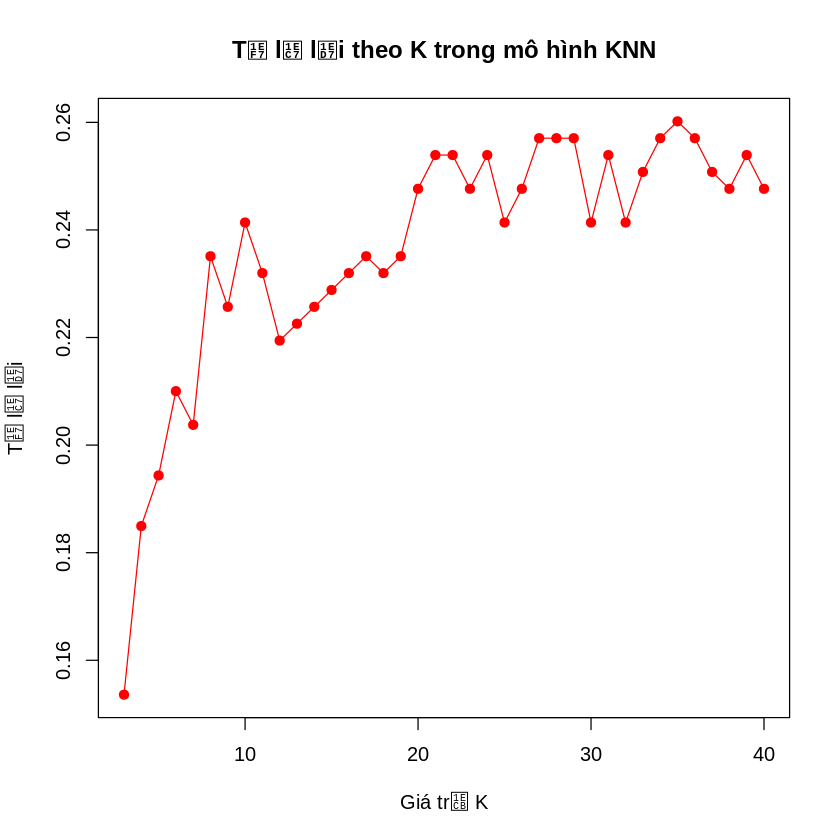

In [10]:
plot(3:40, error_rate, type = "o", col = "red", pch = 19,
     xlab = "Giá trị K", ylab = "Tỷ lệ lỗi",
     main = "Tỷ lệ lỗi theo K trong mô hình KNN")

## Confusion Matrix Heatmap

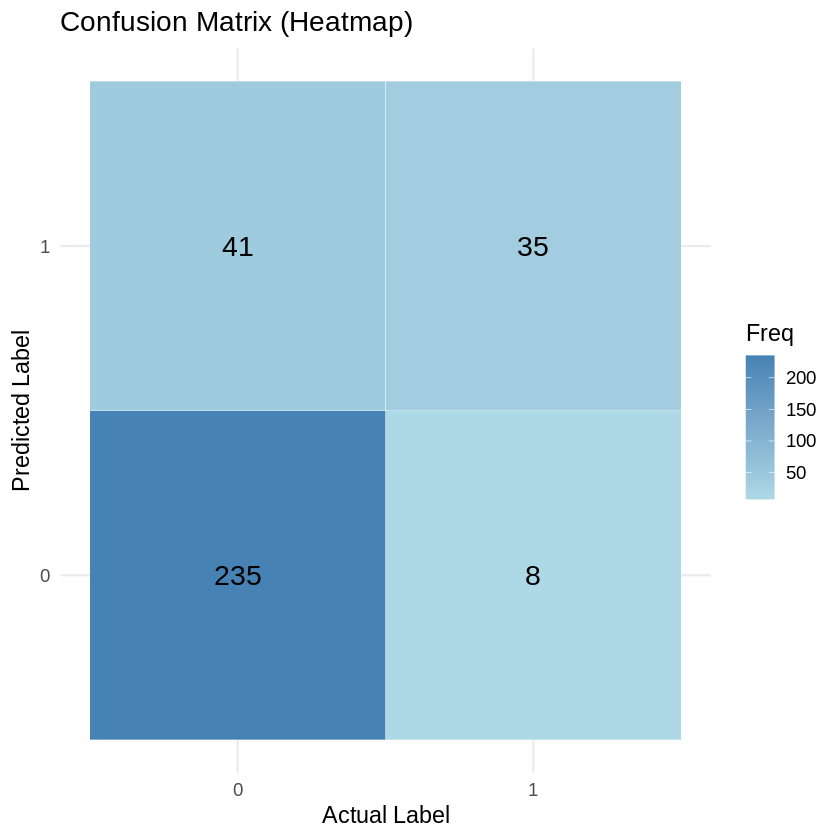

In [11]:
library(reshape2)

# Tạo confusion matrix (giả sử bạn đã có kết quả dự đoán `knn_pred_best`)
cm <- confusionMatrix(knn_pred_best, test_scaled$quality_label)
cm_table <- cm$table

# Chuyển thành dạng data frame cho ggplot2
cm_df <- as.data.frame(cm_table)
colnames(cm_df) <- c("Predicted", "Actual", "Freq")

# Vẽ heatmap bằng ggplot2
ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), size = 6, color = "black") +
  scale_fill_gradient(low = "lightblue", high = "steelblue") +
  labs(title = "Confusion Matrix (Heatmap)",
       x = "Actual Label",
       y = "Predicted Label") +
  theme_minimal(base_size = 14)


## Decision Boundary 2D

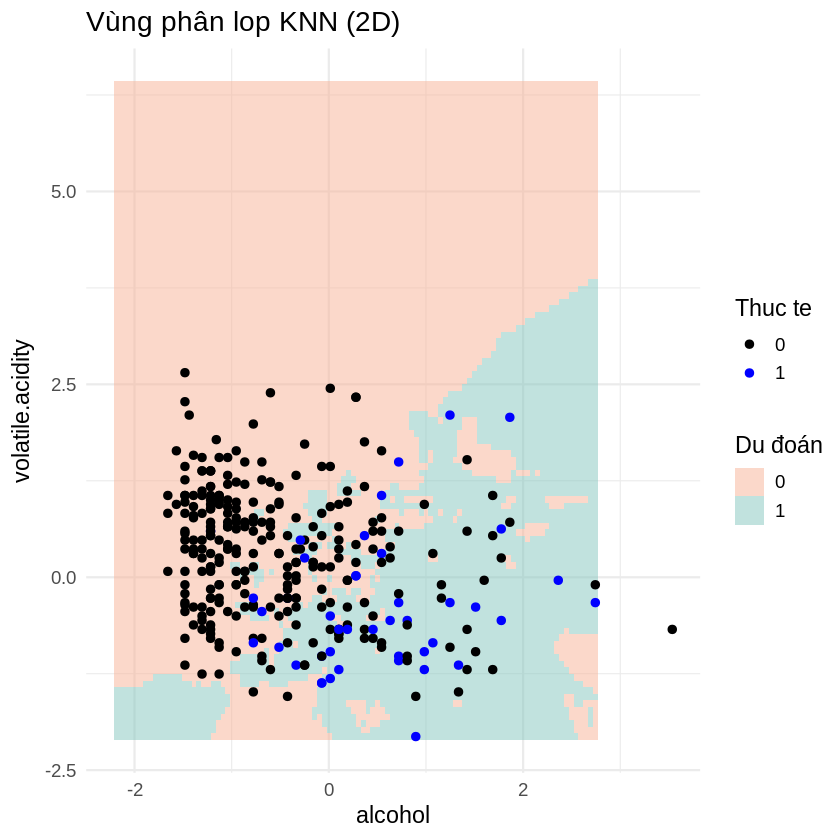

In [14]:
library(ggplot2)
library(class)

# Chọn hai thuộc tính đặc trưng chính
train_sub <- train_scaled[, c("alcohol", "volatile.acidity", "quality_label")]
test_sub <- test_scaled[, c("alcohol", "volatile.acidity", "quality_label")]

# Tạo lưới giá trị để dự đoán
x_range <- seq(min(train_sub$alcohol), max(train_sub$alcohol), length.out = 100)
y_range <- seq(min(train_sub$volatile.acidity), max(train_sub$volatile.acidity), length.out = 100)
grid <- expand.grid(alcohol = x_range, volatile.acidity = y_range)

# Dự đoán trên lưới bằng mô hình KNN
grid_pred <- knn(train = train_sub[, 1:2],
                 test = grid,
                 cl = train_sub$quality_label,
                 k = 9)  # dùng k tối ưu

grid$pred <- grid_pred

# Vẽ vùng phân lớp
ggplot() +
  geom_tile(data = grid, aes(x = alcohol, y = volatile.acidity, fill = pred), alpha = 0.5) +
  geom_point(data = test_sub, aes(x = alcohol, y = volatile.acidity, color = quality_label), size = 2) +
  scale_fill_manual(values = c("0" = "#f8b195", "1" = "#83c5be")) +
  scale_color_manual(values = c("0" = "black", "1" = "blue")) +
  labs(title = "Vùng phân lop KNN (2D)",
       fill = "Du đoán",
       color = "Thuc te") +
  theme_minimal(base_size = 14)
